In [26]:
import pandas as pd
import openai
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt


df = pd.read_csv('./results/footballTransferNewsEmbeddings.csv')
df['embedding'] = df.embedding.apply(eval).apply(np.array)

In [27]:


matrix = np.vstack(df.embedding.values)
n_clusters = 4

kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels



/Users/holmgmat/miniconda3/envs/tf_m1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

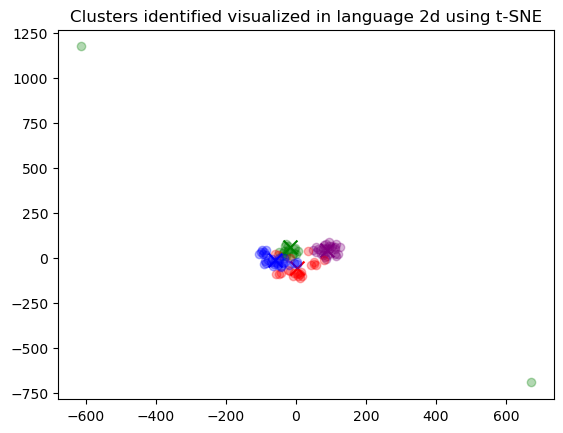

In [60]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [40]:
article_per_cluster = 5
file_path = "./results/openai_cluster_estimations.txt"
for i in range(n_clusters): 
    print(f"Cluster {i}:", end=" ")

    article = "\n".join(
        df[df.Cluster == i]
        .Combined.str.replace("Title: ", "")
        .str.replace("\n\nContent: ", ":  ")
        .sample(article_per_cluster, random_state=42)
        .values
    )
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following football news readings have in common?\n\nNews reading:\n"""\n{article}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    conclusion = response["choices"][0]["text"].replace("\n", "") + "\n"
    print(conclusion)

    sample_cluster_rows = df[df.Cluster == i].sample(article_per_cluster, random_state=42)
    with open(file_path, 'a') as file:
        file.write(f"Cluster {i}: ")
        file.write(conclusion)
        for j in range(article_per_cluster):
            date = sample_cluster_rows.Date.values[j]
            link = sample_cluster_rows.Link.values[j]
            text = sample_cluster_rows.Content.values[j][:200] + "..."
            print(date, end=", ")
            print(link, end=":   ")
            print(link)
            file.write(f"{date}, {link}:   {text}\n")
    
        file.write("-" * 100 + "\n")
        print("-" * 100)

0     3
1     0
2     3
3     0
4     1
     ..
95    3
96    2
97    1
98    2
99    1
Name: Cluster, Length: 100, dtype: int32
Cluster 0:  All of the news readings are about football transfers.

Aug 9, 2023, https://www.90min.com/posts/virgil-van-dijk-responds-criticism-liverpool-transfer-business:   https://www.90min.com/posts/virgil-van-dijk-responds-criticism-liverpool-transfer-business
Aug 12, 2023, https://www.90min.com/posts/jurgen-klopp-confirms-liverpool-exit-saudi-star:   https://www.90min.com/posts/jurgen-klopp-confirms-liverpool-exit-saudi-star
Aug 14, 2023, https://www.90min.com/posts/chelsea-agree-british-record-deal-brighton-moises-caicedo:   https://www.90min.com/posts/chelsea-agree-british-record-deal-brighton-moises-caicedo
Aug 11, 2023, https://www.90min.com/posts/jurgen-klopp-why-liverpool-afford-moises-caicedo-not-jude-bellingham:   https://www.90min.com/posts/jurgen-klopp-why-liverpool-afford-moises-caicedo-not-jude-bellingham
Aug 14, 2023, https://www.90min.com/